In [1]:
import os
import sys

In [2]:
os.getcwd()
root_path=os.path.dirname(os.getcwd())
root_path
sys.path.append(root_path)
sys.path

['c:\\Users\\carlo\\OneDrive\\Escritorio\\carlos-curso-thebridge\\antiphi\\notebooks',
 'c:\\Users\\carlo\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles',
 'c:\\Users\\carlo\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles\\lib\\python',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\python37.zip',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\DLLs',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\lib',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37',
 '',
 'C:\\Users\\carlo\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\win32',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-pa

In [3]:
from utils.functions import *

In [4]:
import pandas as pd
import numpy as np

In [5]:
from scipy.io import arff

#### Load dataset

In [6]:
complete_training = getProcessedDataFrame("..\\data\\Training_Dataset.arff")

In [7]:
complete_training

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


#### Select columns

In [8]:
reduced_df = complete_training[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'HTTPS_token','Result']]

#### Convert negative numbers to positive numbers

In [52]:
convertEncodingToPositive(reduced_df)

In [53]:
reduced_df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,HTTPS_token,Result
0,2,1,1,1,2,2,2,2,2
1,1,1,1,1,1,2,0,2,2
2,1,0,1,1,1,2,2,2,2
3,1,0,1,1,1,2,2,2,2
4,1,0,2,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...
11050,1,2,1,2,1,1,1,1,1
11051,2,1,1,2,2,2,1,1,2
11052,1,2,1,1,1,2,1,1,2
11053,2,2,1,1,1,2,2,1,2


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

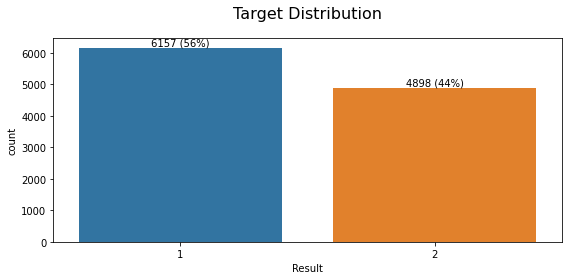

In [41]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=reduced_df['Result'], ax=ax)

abs_vals = reduced_df['Result'].value_counts()
rel_vals = reduced_df['Result'].value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Target Distribution', fontsize=16, pad=20)

plt.tight_layout();
# 1 corresponde a legítimo, 2 a phishing

<AxesSubplot:>

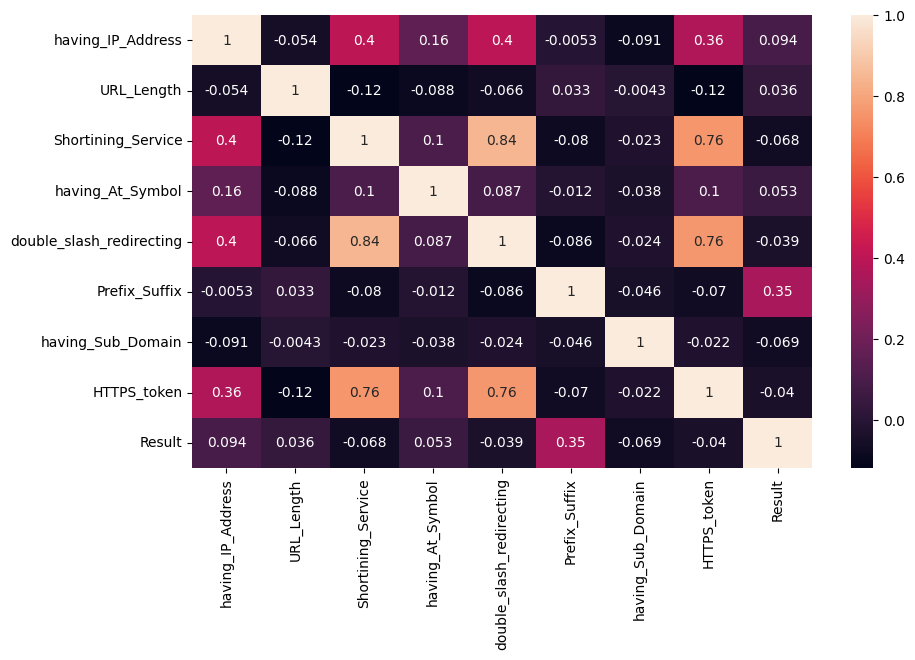

In [42]:
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(reduced_df.corr(),annot=True)
#Alta correlación entre el precio del billete y el tipo de clase.

In [50]:
reduced_df.to_csv("df_api.csv")